In [41]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [42]:
df = pd.read_csv('../datasets/Movies_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86493 entries, 0 to 86492
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    86493 non-null  int64  
 1   title                 86493 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  int64  
 4   status                86493 non-null  object 
 5   release_date          86427 non-null  object 
 6   revenue               86493 non-null  int64  
 7   runtime               86493 non-null  int64  
 8   adult                 86493 non-null  bool   
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  int64  
 11  homepage              17774 non-null  object 
 12  imdb_id               86467 non-null  object 
 13  original_language     86493 non-null  object 
 14  original_title        86493 non-null  object 
 15  overview           

# Usunięcie niepotrzebnych kolumn

In [43]:
df = df.drop(columns=['tagline', 'adult', 'title', 'homepage', 'backdrop_path', 'imdb_id', 'original_title', 'overview', 'movieId', 'poster_path', 'id'])
df = df[df['status'] == 'Released']
df = df.drop(columns=['status'])

In [44]:
print(df.info())

df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 86477 entries, 0 to 86492
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          86477 non-null  float64
 1   vote_count            86477 non-null  int64  
 2   release_date          86416 non-null  object 
 3   revenue               86477 non-null  int64  
 4   runtime               86477 non-null  int64  
 5   budget                86477 non-null  int64  
 6   original_language     86477 non-null  object 
 7   popularity            86477 non-null  float64
 8   genres                84906 non-null  object 
 9   production_companies  72717 non-null  object 
 10  production_countries  79781 non-null  object 
 11  spoken_languages      82388 non-null  object 
 12  keywords              60223 non-null  object 
 13  Directors             77744 non-null  object 
 14  Cast                  77744 non-null  object 
 15  StarActors            77

,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,Directors,Cast,StarActors
0,8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
1,8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Matthew McConaughey, Anne Hathaway, Jessica Ch..."
2,8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Christian Bale, Heath Ledger, Aaron Eckhart"


# Usunięcie nieczęstych wartości z kolumn których wartości są listami

In [45]:
def remove_uncommon_values(df, column_name, min_count):
    df[column_name] = df[column_name].fillna('')
    df[column_name] = df[column_name].str.split(', ')
    df[column_name] = df[column_name].apply(lambda x: [] if x == '' else x)

    listOfValues = df[column_name].explode()
    print(f'Distinct values for column {column_name} before: {listOfValues.nunique()}')

    counts = listOfValues.value_counts()
    listOfValues = listOfValues[listOfValues.isin(counts[counts > min_count].index)]

    allowed_values = set(listOfValues)
    df[column_name] = df[column_name].apply(lambda kw_list: [kw for kw in kw_list if kw in allowed_values])

    print(f'Distinct values for column {column_name} after: {df[column_name].explode().nunique()}')
    return df

df = remove_uncommon_values(df, 'keywords', 20)
df = remove_uncommon_values(df, 'production_companies', 10)
df = remove_uncommon_values(df, 'production_countries', 10)
df = remove_uncommon_values(df, 'Directors', 10)
df = remove_uncommon_values(df, 'Cast', 12)
df = remove_uncommon_values(df, 'StarActors', 10)

Distinct values for column keywords before: 28032
Distinct values for column keywords after: 2614
Distinct values for column production_companies before: 45538
Distinct values for column production_companies after: 2246
Distinct values for column production_countries before: 200
Distinct values for column production_countries after: 114
Distinct values for column Directors before: 34519
Distinct values for column Directors after: 1211
Distinct values for column Cast before: 266480
Distinct values for column Cast after: 9323
Distinct values for column StarActors before: 87242
Distinct values for column StarActors after: 3534


# Sprawdzenie numerycznych wartości odstających

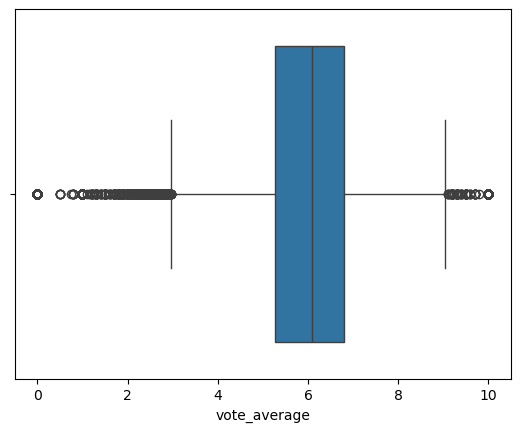

Found 4272 outliers out of 86477 rows for column vote_average
vote_average
0.000     2560
2.000      359
10.000     280
1.000      201
2.500      134
          ... 
2.773        1
2.870        1
2.256        1
2.098        1
2.890        1
Name: count, Length: 187, dtype: int64


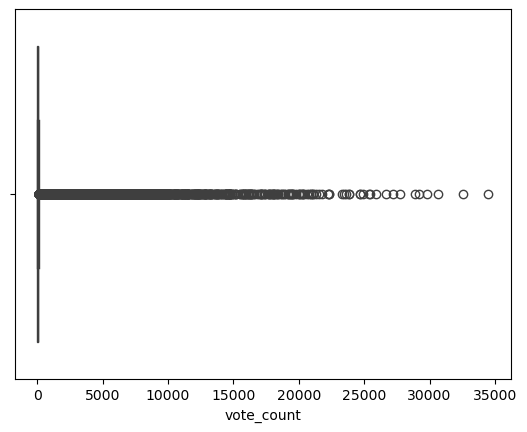

Found 13091 outliers out of 86477 rows for column vote_count
vote_count
167     59
161     58
177     57
179     55
158     51
        ..
3599     1
3585     1
3583     1
3580     1
2132     1
Name: count, Length: 3425, dtype: int64


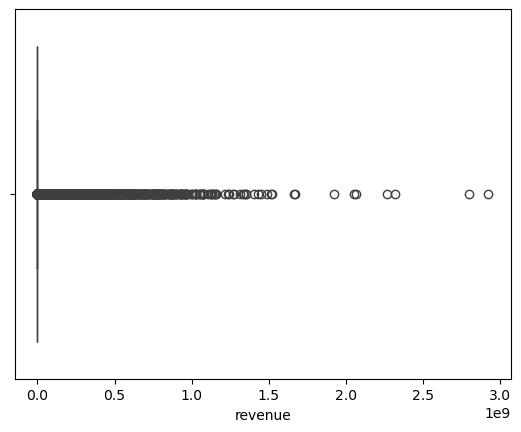

Found 13038 outliers out of 86477 rows for column revenue
revenue
2000000     41
10000000    39
1000000     32
3000000     32
5000000     32
            ..
31070412     1
1710528      1
24741667     1
22468044     1
2559000      1
Name: count, Length: 11628, dtype: int64


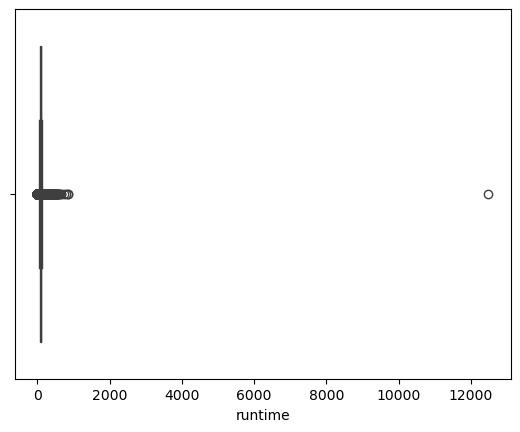

Found 11237 outliers out of 86477 rows for column runtime
runtime
0      1255
7       697
8       391
1       313
10      311
       ... 
249       1
268       1
275       1
551       1
373       1
Name: count, Length: 250, dtype: int64


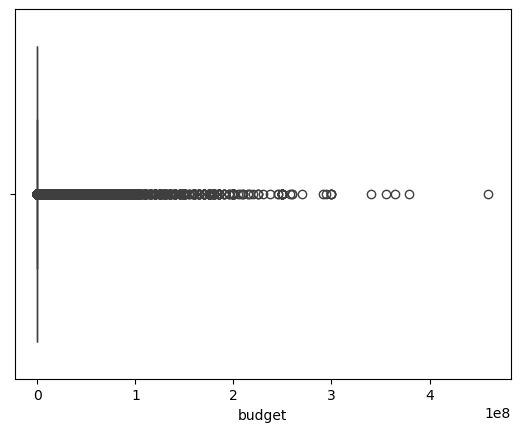

Found 14606 outliers out of 86477 rows for column budget
budget
10000000    439
5000000     418
2000000     386
1000000     380
3000000     351
           ... 
823258        1
8311205       1
952707        1
4150000       1
61500         1
Name: count, Length: 2309, dtype: int64


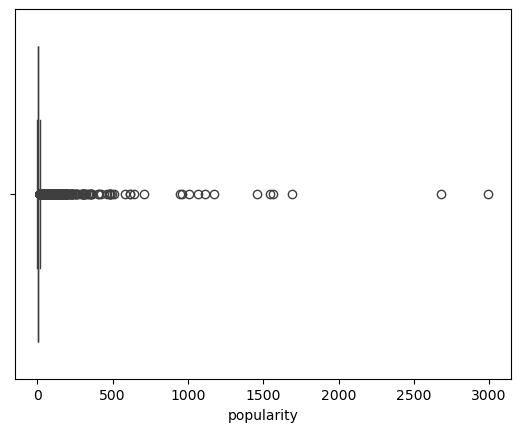

Found 7074 outliers out of 86477 rows for column popularity
popularity
14.878    6
18.957    5
14.964    5
16.378    4
15.320    4
         ..
19.663    1
19.181    1
18.280    1
38.873    1
16.644    1
Name: count, Length: 6004, dtype: int64


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    outliers = df[(df[column_name] < (q1 - 1.5 * iqr)) | (df[column_name] > (q3 + 1.5 * iqr))]

    sns.boxplot(x=df[column_name])
    plt.show()
    print(f"Found {len(outliers)} outliers out of {df.shape[0]} rows for column {column_name}")
    print(outliers[column_name].value_counts())

    return outliers

for col in ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']:
    outliers = find_outliers(df, col)

# Zastąpienie wartości odstających

In [47]:
def cap_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q1 + 1.5 * iqr

    df[column_name] = df[column_name].clip(lower, upper)
    return df

for col in ['runtime', 'budget', 'popularity']:
    df = cap_outliers(df, col)
    print('Capped outliers for', col)

Capped outliers for runtime
Capped outliers for budget
Capped outliers for popularity


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86477 entries, 0 to 86492
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          86477 non-null  float64
 1   vote_count            86477 non-null  int64  
 2   release_date          86416 non-null  object 
 3   revenue               86477 non-null  int64  
 4   runtime               86477 non-null  int64  
 5   budget                86477 non-null  int64  
 6   original_language     86477 non-null  object 
 7   popularity            86477 non-null  float64
 8   genres                84906 non-null  object 
 9   production_companies  86477 non-null  object 
 10  production_countries  86477 non-null  object 
 11  spoken_languages      82388 non-null  object 
 12  keywords              86477 non-null  object 
 13  Directors             86477 non-null  object 
 14  Cast                  86477 non-null  object 
 15  StarActors            86

# Enkodowanie wartości tekstowych

In [49]:
def encode_using_mlb(df, column_name):
    print(f'Shape before encoding {column_name}: {df.shape}')
    mlb = MultiLabelBinarizer()
    encoded = mlb.fit_transform(df[column_name])
    encoded = pd.DataFrame(encoded, columns=mlb.classes_)
    
    # necessary for merging df and encoded
    df = df.reset_index(drop=True)
    encoded = encoded.reset_index(drop=True)

    df = df.drop(columns=column_name)
    df = pd.concat([df, encoded], axis=1)
    print(f'Shape after encoding {column_name}: {df.shape}')

    return df

df['genre_list'] = df['genres'].str.split(', ')
df = df.drop(columns='genres')
df['genre_list'] = df['genre_list'].fillna('').apply(lambda x: [] if x == '' else x)

df = encode_using_mlb(df, 'genre_list')

Shape before encoding genre_list: (86477, 16)
Shape after encoding genre_list: (86477, 34)


In [50]:
df['spoken_languages'] = df['spoken_languages'].str.split(', ')
df['spoken_languages'] = df['spoken_languages'].fillna('').apply(lambda x: [] if x == '' else x)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          86477 non-null  float64
 1   vote_count            86477 non-null  int64  
 2   release_date          86416 non-null  object 
 3   revenue               86477 non-null  int64  
 4   runtime               86477 non-null  int64  
 5   budget                86477 non-null  int64  
 6   original_language     86477 non-null  object 
 7   popularity            86477 non-null  float64
 8   production_companies  86477 non-null  object 
 9   production_countries  86477 non-null  object 
 10  spoken_languages      86477 non-null  object 
 11  keywords              86477 non-null  object 
 12  Directors             86477 non-null  object 
 13  Cast                  86477 non-null  object 
 14  StarActors            86477 non-null  object 
 15  Action             

In [52]:
def encode_text_values(df, column_name):
    tokens = set()
    for seq in df[column_name]:
        for token in seq:
            tokens.add(token)

    vocab = {word: idx + 1 for idx, word in enumerate(tokens)}
    vocab['<PAD>'] = 0

    df[column_name] = df[column_name].apply(lambda seq: [vocab[word] for word in seq])
    
    lenCol = column_name + '_length'
    df[lenCol] = df[column_name].apply(len)
    max_len = df[lenCol].max()

    # padding
    def add_padding(seq):
        nonlocal max_len
        if len(seq) < max_len:
            for _ in range(max_len - len(seq)):
                seq.append(vocab['<PAD>'])
        return seq

    df[column_name] = df[column_name].apply(add_padding)
    df = df.drop(columns=lenCol)

    return df


for col in ['keywords', 'production_companies', 'production_countries', 'original_language', 'spoken_languages', 'Directors', 'Cast', 'StarActors']:
    df = encode_text_values(df, col)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          86477 non-null  float64
 1   vote_count            86477 non-null  int64  
 2   release_date          86416 non-null  object 
 3   revenue               86477 non-null  int64  
 4   runtime               86477 non-null  int64  
 5   budget                86477 non-null  int64  
 6   original_language     86477 non-null  object 
 7   popularity            86477 non-null  float64
 8   production_companies  86477 non-null  object 
 9   production_countries  86477 non-null  object 
 10  spoken_languages      86477 non-null  object 
 11  keywords              86477 non-null  object 
 12  Directors             86477 non-null  object 
 13  Cast                  86477 non-null  object 
 14  StarActors            86477 non-null  object 
 15  Action             

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          86477 non-null  float64
 1   vote_count            86477 non-null  int64  
 2   release_date          86416 non-null  object 
 3   revenue               86477 non-null  int64  
 4   runtime               86477 non-null  int64  
 5   budget                86477 non-null  int64  
 6   original_language     86477 non-null  object 
 7   popularity            86477 non-null  float64
 8   production_companies  86477 non-null  object 
 9   production_countries  86477 non-null  object 
 10  spoken_languages      86477 non-null  object 
 11  keywords              86477 non-null  object 
 12  Directors             86477 non-null  object 
 13  Cast                  86477 non-null  object 
 14  StarActors            86477 non-null  object 
 15  Action             

# Ustawienie brakujących wartości w kolumnie 'release_date' na medianę oraz konwersja do UNIX timestamp

In [54]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].astype('int64') // 10 ** 9 # convert to UNIX timestamp
median_date = df['release_date'].median()
print('Median date:', median_date)
df['release_date'] = df['release_date'].fillna(median_date)

Median date: 1139529600.0


In [56]:
df.to_parquet('../datasets/Movies_clean.parquet', compression='brotli')